# Exploratory Data Analysis


## Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


### Filter for US Data Analyst roles

In [2]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

# Pick a few columns to do an EDA
df_DA_US['job_location'].value_counts().head(10)

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

We're going to use Seaborn to plot this data, so we can customize it like we want it.
To make it easier, we're going to this dataset above into a Data Frame with the `.to_frame` method.
We're also going to assign it to a variable called df_plot, which we will be using going forward.

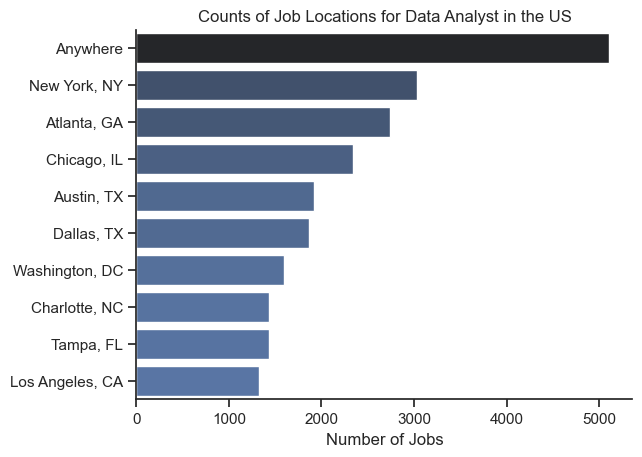

In [14]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

# Plotting
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the border around the graph
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Here we're going to plot some of the Boolean columns: Work from home, Degree required and Health insurance offered

The code below is slightly adjusted from chapter 2_14

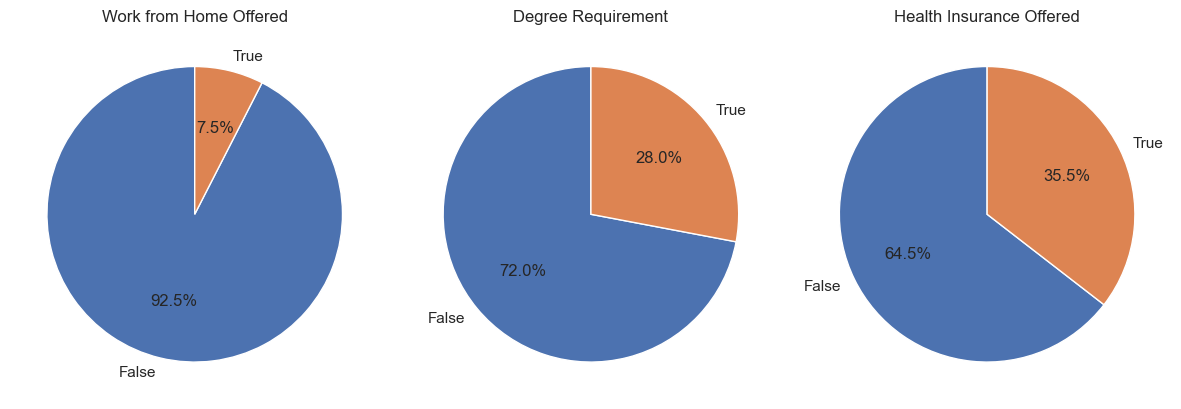

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Plotting
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

### In this part we're going to look at the Companies data

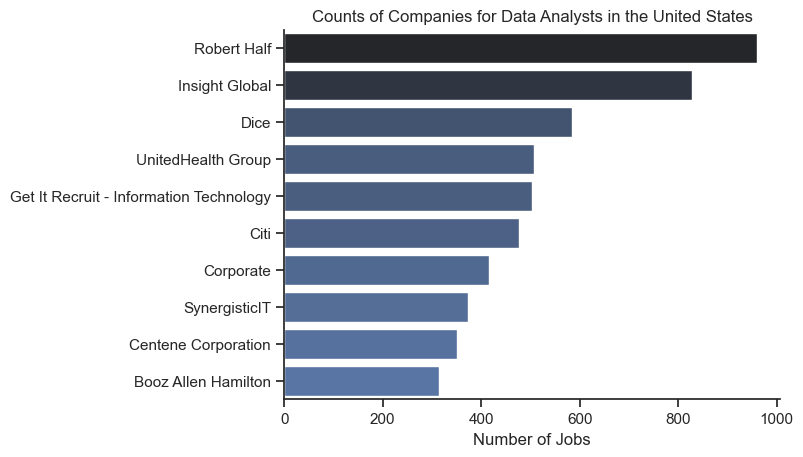

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

# Plotting
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the border around the graph
plt.title('Counts of Companies for Data Analysts in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()